Importing Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, LassoCV, RidgeCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression


Read data and filter it based on SICCD 4800 to 4899

In [ ]:
# Read the CSV from WRDS (estimation period)
df = pd.read_csv("Raw/2000.csv") 

# Convert the SICCD column to numeric
df['SICCD'] = pd.to_numeric(df['SICCD'], errors='coerce')

communication_df = df[
    ((df['SICCD'] >= 4800) & (df['SICCD'] <= 4899)) |  # Core Telecom & Cable
    ((df['SICCD'] >= 2711) & (df['SICCD'] <= 2759)) |  # Publishing, Media & Printing (EXPANDED)
    ((df['SICCD'] >= 7812) & (df['SICCD'] <= 7832)) |  # Motion Pictures
    ((df['SICCD'] >= 7370) & (df['SICCD'] <= 7379)) |  # Internet & Software
    ((df['SICCD'] >= 7900) & (df['SICCD'] <= 7999)) |  # Entertainment
    ((df['SICCD'] >= 3661) & (df['SICCD'] <= 3674))    # Communications Equipment & Semiconductors (EXPANDED)                        # Motion picture & video tape distribution
].copy()

# Result
print(communication_df)
communication_df.to_csv("Raw/communication_services_2000.csv", index=False)

C:\Users\fazlu\AppData\Local\Temp\ipykernel_31708\4225820295.py:2: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2000.csv")


          PERMNO        date   SICCD                          COMNAM     PRC  \
7542       10012  2000-01-03  3670.0  DENSE PACIFIC MICROSYSTEMS INC  8.0000   
7543       10012  2000-01-04  3670.0  DENSE PACIFIC MICROSYSTEMS INC  7.3125   
7544       10012  2000-01-05  3670.0  DENSE PACIFIC MICROSYSTEMS INC  8.0000   
7545       10012  2000-01-06  3670.0  DENSE PACIFIC MICROSYSTEMS INC  7.5000   
7546       10012  2000-01-07  3670.0  DENSE PACIFIC MICROSYSTEMS INC  7.5625   
...          ...         ...     ...                             ...     ...   
28591475   93430  2012-02-28  7372.0              CYBERDEFENDER CORP  0.0641   
28591476   93430  2012-02-29  7372.0              CYBERDEFENDER CORP  0.0900   
28591477   93430  2012-03-01  7372.0              CYBERDEFENDER CORP  0.0900   
28591478   93430  2012-03-02  7372.0              CYBERDEFENDER CORP  0.0590   
28591479   93430  2012-03-05  7372.0              CYBERDEFENDER CORP     NaN   

                RET   SHROUT  
7542    

In [ ]:
# Read the CSV file
df = pd.read_csv("Raw/2016.csv") 

# Convert the SICCD column to numeric, forcing errors to NaN (not a number)
df['SICCD'] = pd.to_numeric(df['SICCD'], errors='coerce')

communication_df = df[
    ((df['SICCD'] >= 4800) & (df['SICCD'] <= 4899)) |  # Core Telecom & Cable
    ((df['SICCD'] >= 2711) & (df['SICCD'] <= 2759)) |  # Publishing, Media & Printing (EXPANDED)
    ((df['SICCD'] >= 7812) & (df['SICCD'] <= 7832)) |  # Motion Pictures
    ((df['SICCD'] >= 7370) & (df['SICCD'] <= 7379)) |  # Internet & Software
    ((df['SICCD'] >= 7900) & (df['SICCD'] <= 7999)) |  # Entertainment
    ((df['SICCD'] >= 3661) & (df['SICCD'] <= 3674))    # Communications Equipment & Semiconductors (EXPANDED)                        # Motion picture & video tape distribution
].copy()

# Result
print(communication_df)
communication_df.to_csv("Raw/communication_services_2016.csv", index=False)

C:\Users\fazlu\AppData\Local\Temp\ipykernel_31708\486924023.py:2: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2016.csv")


          PERMNO        date   SICCD                      COMNAM        PRC  \
5195       10032  2016-01-04  3670.0                 PLEXUS CORP   34.22000   
5196       10032  2016-01-05  3670.0                 PLEXUS CORP   34.22000   
5197       10032  2016-01-06  3670.0                 PLEXUS CORP   33.50000   
5198       10032  2016-01-07  3670.0                 PLEXUS CORP   32.70000   
5199       10032  2016-01-08  3670.0                 PLEXUS CORP   31.91000   
...          ...         ...     ...                         ...        ...   
18719430   93429  2024-06-13  7374.0  C B O E GLOBAL MARKETS INC  168.71001   
18719431   93429  2024-06-14  7374.0  C B O E GLOBAL MARKETS INC  167.60001   
18719432   93429  2024-06-17  7374.0  C B O E GLOBAL MARKETS INC  170.27000   
18719433   93429  2024-06-18  7374.0  C B O E GLOBAL MARKETS INC  169.39999   
18719434   93429  2024-06-20  7374.0  C B O E GLOBAL MARKETS INC  172.34000   

                RET    SHROUT  
5195      -0.020046

Filter to only have all data (no missing)

In [ ]:

# 1. Load data
estimation_df = pd.read_csv("Raw/communication_services_2000.csv", parse_dates=['date'])
outofsample_df = pd.read_csv("Raw/communication_services_2016.csv", parse_dates=['date'])


# 2. Merge into full panel
full_df = pd.concat([estimation_df, outofsample_df], ignore_index=True)
# Count rows with any missing values

missing_rows_count = full_df.isna().any(axis=1).sum()

# Count missing values per column
missing_per_column = full_df.isna().sum()

print(f"Total rows with at least one missing value: {missing_rows_count}")
print("\nMissing values per column:")
print(missing_per_column)



C:\Users\fazlu\AppData\Local\Temp\ipykernel_18632\1699674412.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  outofsample_df = pd.read_csv("communication_services_2016.csv", parse_dates=['date'])


Total rows with at least one missing value: 134884

Missing values per column:
PERMNO         0
date           0
SICCD          0
COMNAM         0
PRC       134884
RET         5084
SHROUT      2084
dtype: int64


In [5]:

# 1. Identify all PERMNOs that have any missing values
permnos_with_missing = full_df.loc[full_df.isna().any(axis=1), 'PERMNO'].unique()

# 2. Filter out those PERMNOs completely
full_df_clean = full_df[~full_df['PERMNO'].isin(permnos_with_missing)].copy()

# 3. Check results
print("Unique PERMNO before:", full_df['PERMNO'].nunique())
print("Unique PERMNO after :", full_df_clean['PERMNO'].nunique())
print("Rows before:", len(full_df))
print("Rows after:", len(full_df_clean))

Unique PERMNO before: 2886
Unique PERMNO after : 873
Rows before: 5284377
Rows after: 2244646


In [6]:
missing_rows_count = full_df_clean.isna().any(axis=1).sum()

# Count missing values per column
missing_per_column = full_df_clean.isna().sum()

print(f"Total rows with at least one missing value: {missing_rows_count}")
print("\nMissing values per column:")
print(missing_per_column)



Total rows with at least one missing value: 0

Missing values per column:
PERMNO    0
date      0
SICCD     0
COMNAM    0
PRC       0
RET       0
SHROUT    0
dtype: int64


In [7]:
# 5. Check coverage per PERMNO
coverage = (
    full_df_clean.groupby('PERMNO')['date']
           .nunique()
           .reset_index(name='days_present')
)

print(coverage["days_present"].max())
display(coverage.sort_values('days_present').sort_values('days_present', ascending=False) )
clean_permnos = coverage.loc[coverage['days_present'] == coverage["days_present"].max(), 'PERMNO']

# 6. Final clean dataset
clean_df = full_df_clean[full_df_clean['PERMNO'].isin(clean_permnos)].copy()
print("Clean PERMNO count:", clean_df['PERMNO'].nunique())



6289


,PERMNO,days_present
598,86916,6289
3,10104,6289
58,13777,6289
5,10463,6289
4,10107,6289
...,...,...
499,83925,20
439,81651,17
241,25916,9
523,84617,7


Clean PERMNO count: 118


In [8]:
display(clean_df)

,PERMNO,date,SICCD,COMNAM,PRC,RET,SHROUT
1404,10032,2000-01-03,3670.0,PLEXUS CORP,43.25000,-0.017045,17638.0
1405,10032,2000-01-04,3670.0,PLEXUS CORP,42.09375,-0.026734,17638.0
1406,10032,2000-01-05,3670.0,PLEXUS CORP,42.06250,-0.000742,17638.0
1407,10032,2000-01-06,3670.0,PLEXUS CORP,42.12500,0.001486,17638.0
1408,10032,2000-01-07,3670.0,PLEXUS CORP,42.43750,0.007418,17638.0
...,...,...,...,...,...,...,...
5049531,88664,2024-12-24,7373.0,HENRY JACK & ASSOC INC,177.05000,0.008028,72959.0
5049532,88664,2024-12-26,7373.0,HENRY JACK & ASSOC INC,177.50999,0.002598,72959.0
5049533,88664,2024-12-27,7373.0,HENRY JACK & ASSOC INC,176.88000,-0.003549,72959.0
5049534,88664,2024-12-30,7373.0,HENRY JACK & ASSOC INC,175.08000,-0.010176,72959.0


In [9]:

prc_count = (
    clean_df.groupby('PERMNO')['RET']
            .count()  # counts non-null RET values
            .reset_index(name='RET_COUNT')
            .sort_values('RET_COUNT', ascending=False)  # or ascending=True
)
display(prc_count)


,PERMNO,RET_COUNT
0,10032,6289
1,10104,6289
2,10107,6289
3,10463,6289
4,10696,6289
...,...,...
113,87344,6289
114,87364,6289
115,87439,6289
116,87508,6289


Category
Comm Equip & Semiconductors    42
Entertainment                   5
Internet & Software            42
Motion Pictures                 1
Publishing / Printing           7
Telecom & Cable                26
Name: PERMNO, dtype: int64

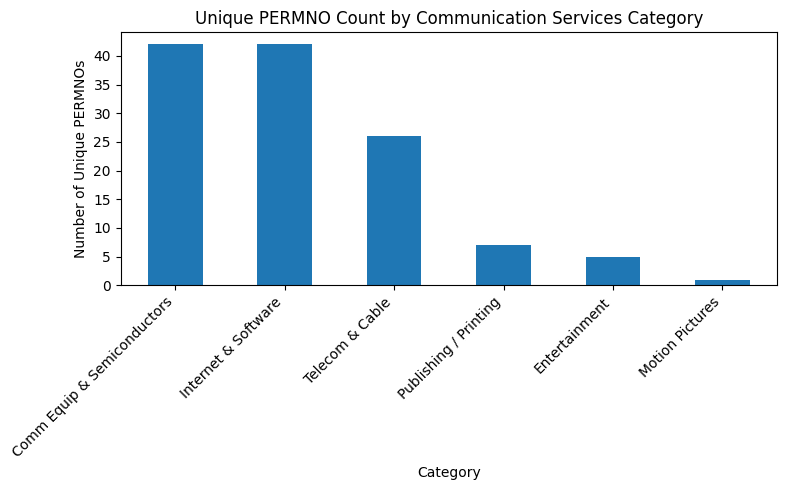

In [18]:

# Assign category labels
def categorize_sic(sic):
    if 4800 <= sic <= 4899:
        return "Telecom & Cable"
    elif 2711 <= sic <= 2759:
        return "Publishing / Printing"
    elif 7812 <= sic <= 7832:
        return "Motion Pictures"
    elif 7370 <= sic <= 7379:
        return "Internet & Software"
    elif 7900 <= sic <= 7999:
        return "Entertainment"
    elif 3661 <= sic <= 3674:
        return "Comm Equip & Semiconductors"
    else:
        return "Other"

clean_df['Category'] = clean_df['SICCD'].apply(categorize_sic)

# Count unique PERMNOs in each category
permno_counts = clean_df.groupby('Category')['PERMNO'].nunique()
display(permno_counts)

# Plot histogram
plt.figure(figsize=(8,5))
permno_counts.sort_values(ascending=False).plot(kind='bar')
plt.title("Unique PERMNO Count by Communication Services Category")
plt.ylabel("Number of Unique PERMNOs")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
category_permnos = (
    clean_df.groupby('Category')
    .agg(
        SICCD_List=('SICCD', lambda x: sorted(set(x))),       # list of unique SICCDs
        PERMNO_List=('PERMNO', lambda x: sorted(set(x))),     # list of unique PERMNOs
        Unique_PERMNO_Count=('PERMNO', 'nunique')             # count of unique PERMNOs
    )
    .reset_index()
    .sort_values('Unique_PERMNO_Count', ascending=False)      # largest first
)

display(category_permnos)
category_permnos.to_csv("category_permnos.csv", index=False)


,Category,SICCD_List,PERMNO_List,Unique_PERMNO_Count
0,Comm Equip & Semiconductors,"[3661.0, 3662.0, 3663.0, 3669.0, 3670.0, 3672....","[10032, 10463, 11154, 17444, 44943, 45911, 509...",42
2,Internet & Software,"[7370.0, 7371.0, 7372.0, 7373.0, 7374.0, 7375....","[10104, 10107, 10696, 11403, 13777, 20117, 205...",42
5,Telecom & Cable,"[4812.0, 4813.0, 4820.0, 4822.0, 4830.0, 4832....","[11174, 29647, 39731, 63773, 66093, 75104, 753...",26
4,Publishing / Printing,"[2711.0, 2731.0, 2740.0, 2741.0]","[47466, 47941, 50286, 82924, 82932, 84176, 86887]",7
1,Entertainment,"[7929.0, 7940.0, 7948.0, 7990.0, 7993.0]","[47941, 79026, 79507, 79791, 80563]",5
3,Motion Pictures,"[7812.0, 7819.0]",[86408],1


In [28]:
# 1) Define allowed and banned sets (row-level, same as you have)
allowed = (
    clean_df['SICCD'].between(4800, 4899) |  # telecom
    clean_df['SICCD'].isin([3661,3662,3663,3669,3664,  # comm equip + 3664 boost
                      3674,7370,7371, 7373, 7374,7375,7376,7379, # internet/software (your picks)
                      2711,2721,2731,2741,2740, # publishing
                      7812,7819,7822,7929])          # motion pictures
)

banned = (
    clean_df['SICCD'].isin([3670,3672, 2752,2754,2759]) |
    clean_df['SICCD'].isin([7372, 7812.0, 7819.0]) |
    clean_df['SICCD'].between(7930, 7999)
)

# 2) Pick a PERMNO-level rule. Example: dominant SICCD must be allowed and not banned.
dom_siccd = clean_df.groupby('PERMNO')['SICCD'].agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])
eligible_permnos = dom_siccd.index[allowed.groupby(clean_df['PERMNO']).agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])]
eligible_permnos = eligible_permnos.difference(dom_siccd.index[banned.groupby(clean_df['PERMNO']).agg(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])])

# 3) Keep all rows for eligible PERMNOs (preserves counts like 6289)
df_pruned = clean_df[clean_df['PERMNO'].isin(eligible_permnos)].copy()


In [ ]:
permno_counts = df_pruned.groupby('Category')['PERMNO'].nunique()
print(permno_counts)
print("Clean PERMNO count:", df_pruned['PERMNO'].nunique())

Category
Comm Equip & Semiconductors    13
Entertainment                   1
Internet & Software            31
Publishing / Printing           7
Telecom & Cable                26
Name: PERMNO, dtype: int64
Clean PERMNO count: 74


In [30]:

df_permno7370 = df_pruned[df_pruned['SICCD']==7370][['PERMNO', 'COMNAM', 'SICCD']].drop_duplicates()
print(df_permno7370)

         PERMNO                          COMNAM   SICCD
11141     10104                     ORACLE CORP  7370.0
15166     10107                  MICROSOFT CORP  7370.0
45828     10696                      FISERV INC  7370.0
273257    20117                     ACXIOM CORP  7370.0
711382    75510               ADOBE SYSTEMS INC  7370.0
725566    75607                   SYMANTEC CORP  7370.0
757756    75912      PARAMETRIC TECHNOLOGY CORP  7370.0
870327    76948  MAGIC SOFTWARE ENTERPRISES LTD  7370.0
926400    77357                    SYNOPSYS INC  7370.0
1053334   78759  SAPIENS INTERNATIONAL CORP N V  7370.0
1097371   78975                      INTUIT INC  7370.0
1170213   79499                   INNODATA CORP  7370.0
1547626   82281        SMITH MICRO SOFTWARE INC  7370.0
1636966   82833                  OPEN TEXT CORP  7370.0
1702490   83391           LANVISION SYSTEMS INC  7370.0
1726519   83486   B O S BETTER ONLINE SOLNS LTD  7370.0
1760485   83621                       ANSYS INC 

In [31]:
permno_7370_safe = [83382, 85753, 87179, 87344, 87487, 86572, 82281]

# PERMNOs that ever have SICCD 7370
permnos_with_7370 = df_pruned.loc[df_pruned['SICCD'] == 7370, 'PERMNO'].unique()

# Keep PERMNOs that never have 7370, OR are explicitly whitelisted
eligible_permnos = (
    df_pruned['PERMNO'].isin(permno_7370_safe) |
    ~df_pruned['PERMNO'].isin(permnos_with_7370)
)

# Keep ALL rows for eligible PERMNOs (preserves their full counts)
df_pruned = df_pruned.loc[eligible_permnos].copy()

permno_counts = df_pruned.groupby('Category')['PERMNO'].nunique()
print(permno_counts)
print("Clean PERMNO count:", df_pruned['PERMNO'].nunique())

Category
Comm Equip & Semiconductors    13
Entertainment                   1
Internet & Software             8
Publishing / Printing           7
Telecom & Cable                26
Name: PERMNO, dtype: int64
Clean PERMNO count: 51


In [32]:
french_2000_df = pd.read_csv("Raw/French2000.csv")
french_2016_df = pd.read_csv("Raw/French2016.csv")
full_df_french = pd.concat([french_2000_df, french_2016_df], ignore_index=True)

full_df_french['date'] = pd.to_datetime(full_df_french['date'])
full_df_french['rf'] = pd.to_numeric(full_df_french['rf'], errors='coerce')
full_df_french = full_df_french.sort_values('date')


df_pruned['date'] = pd.to_datetime(df_pruned['date'])
df_pruned = df_pruned.sort_values('date')

df_pruned = pd.merge_asof(
    df_pruned,
    full_df_french[['date', 'rf']],
    left_on='date',
    right_on='date',
    direction='backward'
)

# Ensure RET is numeric
df_pruned['RET'] = pd.to_numeric(df_pruned['RET'], errors='coerce')

# Calculate EXCESS_RET
df_pruned['EXCESS_RET'] = df_pruned['RET'] - df_pruned['rf']


In [33]:
display(df_pruned)
print("Clean PERMNO count:", df_pruned['PERMNO'].nunique())

,PERMNO,date,SICCD,COMNAM,PRC,RET,SHROUT,Category,rf,EXCESS_RET
0,11174,2000-01-03,4840.0,CROWN GROUP INC,5.10938,0.034810,9711.0,Telecom & Cable,0.00021,0.034600
1,80924,2000-01-03,4830.0,SIRIUS SATELLITE RADIO INC,41.12500,-0.075843,28721.0,Telecom & Cable,0.00021,-0.076053
2,81043,2000-01-03,4813.0,PHILIPPINE LONG DISTANCE TELE CO,28.12500,0.086957,36678.0,Telecom & Cable,0.00021,0.086747
3,81132,2000-01-03,3674.0,STMICROELECTRONICS NV,155.18750,0.024763,284280.0,Comm Equip & Semiconductors,0.00021,0.024553
4,86929,2000-01-03,3663.0,AUDIOCODES LTD,87.50000,-0.048913,19207.0,Comm Equip & Semiconductors,0.00021,-0.049123
...,...,...,...,...,...,...,...,...,...,...
320734,82932,2024-12-31,2731.0,WILEY JOHN & SONS INC,-43.89500,0.006651,8970.0,Publishing / Printing,0.00017,0.006481
320735,55993,2024-12-31,3669.0,NAPCO SECURITY TECHNOLOGIES INC,35.56000,0.005088,36684.0,Comm Equip & Semiconductors,0.00017,0.004918
320736,82924,2024-12-31,2731.0,WILEY JOHN & SONS INC,43.71000,0.002983,45060.0,Publishing / Printing,0.00017,0.002813
320737,44943,2024-12-31,3674.0,DIODES INC,61.67000,0.002275,46333.0,Comm Equip & Semiconductors,0.00017,0.002105


Clean PERMNO count: 51


Generate Descriptive Statistic for estimation period

In [34]:
df_pruned['market_cap'] = df_pruned['PRC'].abs() * df_pruned['SHROUT'] * 1000

est_start = "2000-01-01"
est_end   = "2015-12-31"
oos_start = "2016-01-01"
oos_end   = "2024-12-31"
# --- Step 1: Calculate avg market cap in estimation period ---

mask_est = (df_pruned['date'] >= est_start) & (df_pruned['date'] <= est_end)
mask_oos = (df_pruned['date'] >= oos_start) & (df_pruned['date'] <= oos_end)

avg_mktcap_est = (
    df_pruned.loc[mask_est]
    .groupby('PERMNO')['market_cap']
    .mean()
    .sort_values(ascending=False)
)

# Top 50 PERMNOs
top50_permnos = avg_mktcap_est.head(50).index.tolist()

# --- Helper to build descriptive stats ---
def build_descriptive(df_period, permnos):
    df_period = df_period[df_period['PERMNO'].isin(permnos)]
    
    avg_market_caps = df_period.groupby('PERMNO')['market_cap'].mean()
    
    desc = (
        df_period.groupby('PERMNO')['EXCESS_RET']
        .agg(['mean', 'std', 'min', 'max', 'count'])
        .reset_index()
    )
    
    desc = desc.merge(
        avg_market_caps.reset_index(name='avg_market_cap'),
        on='PERMNO',
        how='left'
    )
    
    cols_to_percent = ['mean', 'std', 'min', 'max']
    desc[cols_to_percent] = (desc[cols_to_percent] * 100).round(2)
    desc = desc.rename(columns={'mean': 'Mean (%)',
                                'std': 'Std (%)',
                                'min': 'Min (%)',
                                'max': 'Max (%)'})
    
    desc = desc.sort_values('avg_market_cap', ascending=False).reset_index(drop=True)
    return desc

# --- Step 2: Build stats only for top 50 PERMNOs ---
estimation_stats = build_descriptive(df_pruned.loc[mask_est], top50_permnos)
oos_stats        = build_descriptive(df_pruned.loc[mask_oos], top50_permnos)

# --- Step 3: Display ---
print("=== Estimation Period (Top 50 by Avg Market Cap) ===")
display(estimation_stats)

print("\n=== Out-of-Sample (Same Top 50) ===")
display(oos_stats)


=== Estimation Period (Top 50 by Avg Market Cap) ===


,PERMNO,Mean (%),Std (%),Min (%),Max (%),count,avg_market_cap
0,66093,0.02,1.70,-12.69,16.28,4025,1.525590e+11
1,76226,0.03,2.65,-20.76,26.58,4025,3.595443e+10
2,44644,0.03,1.59,-23.59,11.82,4025,2.792924e+10
3,29647,0.04,1.70,-34.05,20.13,4025,2.612402e+10
4,86745,0.10,4.43,-44.23,50.99,4025,1.609569e+10
5,81132,-0.01,2.90,-15.17,18.40,4025,1.551116e+10
6,78405,0.05,2.04,-10.34,18.43,4025,1.118552e+10
7,47941,0.01,2.59,-23.97,39.40,4025,1.104122e+10
8,85442,0.05,2.83,-18.50,22.72,4025,1.071355e+10
9,79879,-0.02,4.23,-25.34,36.60,4025,8.355147e+09



=== Out-of-Sample (Same Top 50) ===


,PERMNO,Mean (%),Std (%),Min (%),Max (%),count,avg_market_cap
0,66093,0.02,1.47,-10.42,10.02,2264,1.971695e+11
1,61241,0.23,3.72,-24.23,52.29,2264,9.198561e+10
2,85442,0.12,2.05,-14.04,12.65,2264,8.075107e+10
3,44644,0.07,1.53,-15.26,11.80,2264,7.364191e+10
4,29647,0.00,1.17,-12.72,12.15,2264,3.969163e+10
5,81132,0.09,2.64,-18.90,12.96,2264,2.575235e+10
6,86996,0.04,1.75,-8.94,12.42,2264,2.479350e+10
7,80924,0.00,2.32,-15.28,42.24,2264,2.296622e+10
8,78405,0.01,1.41,-14.22,13.22,2264,1.835935e+10
9,45911,0.04,2.41,-18.20,16.46,2264,1.813545e+10


In [35]:
top50_set = set(top50_permnos)  # faster lookup
top50_df = df_pruned[df_pruned['PERMNO'].isin(top50_set)].copy()

permno_counts = top50_df.groupby('Category')['PERMNO'].nunique()
print(permno_counts)

Category
Comm Equip & Semiconductors    13
Entertainment                   1
Internet & Software             8
Publishing / Printing           6
Telecom & Cable                26
Name: PERMNO, dtype: int64


In [36]:
def add_multiple_rolling_features(df, windows):
    df = df.sort_values(['PERMNO', 'date']).copy()
    for window in windows:
        df[f'rolling_mean_{window}'] = (
            df.groupby('PERMNO')['EXCESS_RET']
            .transform(lambda x: x.shift(1).rolling(window=window).mean())
        )
    return df

In [37]:
rolling_windows = [5, 21, 252, 512]
main_df = add_multiple_rolling_features(top50_df, rolling_windows)

In [38]:
display(main_df.head(20))

,PERMNO,date,SICCD,COMNAM,PRC,RET,SHROUT,Category,rf,EXCESS_RET,market_cap,rolling_mean_5,rolling_mean_21,rolling_mean_252,rolling_mean_512
0,11174,2000-01-03,4840.0,CROWN GROUP INC,5.10938,0.034810,9711.0,Telecom & Cable,0.00021,0.034600,49617189.18,NaN,NaN,NaN,NaN
84,11174,2000-01-04,4840.0,CROWN GROUP INC,5.00000,-0.021407,9711.0,Telecom & Cable,0.00021,-0.021617,48555000.00,NaN,NaN,NaN,NaN
133,11174,2000-01-05,4840.0,CROWN GROUP INC,4.87500,-0.025000,9711.0,Telecom & Cable,0.00021,-0.025210,47341125.00,NaN,NaN,NaN,NaN
200,11174,2000-01-06,4840.0,CROWN GROUP INC,5.18750,0.064103,9711.0,Telecom & Cable,0.00021,0.063893,50375812.50,NaN,NaN,NaN,NaN
224,11174,2000-01-07,4840.0,CROWN GROUP INC,4.75000,-0.084337,9711.0,Telecom & Cable,0.00021,-0.084547,46127250.00,NaN,NaN,NaN,NaN
282,11174,2000-01-10,4840.0,CROWN GROUP INC,4.87500,0.026316,9711.0,Telecom & Cable,0.00021,0.026106,47341125.00,-0.006576,NaN,NaN,NaN
343,11174,2000-01-11,4840.0,CROWN GROUP INC,4.75000,-0.025641,9711.0,Telecom & Cable,0.00021,-0.025851,46127250.00,-0.008275,NaN,NaN,NaN
370,11174,2000-01-12,4840.0,CROWN GROUP INC,4.75000,0.000000,9711.0,Telecom & Cable,0.00021,-0.000210,46127250.00,-0.009122,NaN,NaN,NaN
453,11174,2000-01-13,4840.0,CROWN GROUP INC,4.84375,0.019737,9711.0,Telecom & Cable,0.00021,0.019527,47037656.25,-0.004122,NaN,NaN,NaN
500,11174,2000-01-14,4840.0,CROWN GROUP INC,4.87500,0.006452,9711.0,Telecom & Cable,0.00021,0.006242,47341125.00,-0.012995,NaN,NaN,NaN


In [39]:
LAGS = 5
main_df.sort_values(by=['PERMNO', 'date'], inplace=True)
for lag in range(1, LAGS + 1):
    main_df[f'EXCESS_RET_lag_{lag}'] = main_df.groupby('PERMNO')['EXCESS_RET'].shift(lag)


In [1]:
# Drop missing values first
valid_returns = main_df['EXCESS_RET'].dropna()

# Count negative and positive days
neg_count = (valid_returns < 0).sum()
pos_count = (valid_returns > 0).sum()
zero_count = (valid_returns == 0).sum()
total = len(valid_returns)

# Proportions
neg_pct = neg_count / total * 100
pos_pct = pos_count / total * 100
zero_pct = zero_count / total * 100

# Display
print(f"📉 Negative return days: {neg_count} ({neg_pct:.2f}%)")
print(f"📈 Positive return days: {pos_count} ({pos_pct:.2f}%)")
print(f"⚖️  Zero return days:     {zero_count} ({zero_pct:.2f}%)")
print(f"📊 Total valid days:      {total}")


NameError: name 'main_df' is not defined

In [43]:
est_start = "2000-01-01"
est_end = "2015-12-31"
oos_start = "2016-01-01"
oos_end = "2024-12-31"

estimation_df = main_df[(main_df['date'] >= est_start) & (main_df['date'] <= est_end)].copy()
oos_df = main_df[(main_df['date'] >= oos_start) & (main_df['date'] <= oos_end)].copy()

display(main_df.head(10))

,PERMNO,date,SICCD,COMNAM,PRC,RET,SHROUT,Category,rf,EXCESS_RET,market_cap,rolling_mean_5,rolling_mean_21,rolling_mean_252,rolling_mean_512,EXCESS_RET_lag_1,EXCESS_RET_lag_2,EXCESS_RET_lag_3,EXCESS_RET_lag_4,EXCESS_RET_lag_5
0,11174,2000-01-03,4840.0,CROWN GROUP INC,5.10938,0.034810,9711.0,Telecom & Cable,0.00021,0.034600,49617189.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11174,2000-01-04,4840.0,CROWN GROUP INC,5.00000,-0.021407,9711.0,Telecom & Cable,0.00021,-0.021617,48555000.00,NaN,NaN,NaN,NaN,0.034600,NaN,NaN,NaN,NaN
133,11174,2000-01-05,4840.0,CROWN GROUP INC,4.87500,-0.025000,9711.0,Telecom & Cable,0.00021,-0.025210,47341125.00,NaN,NaN,NaN,NaN,-0.021617,0.034600,NaN,NaN,NaN
200,11174,2000-01-06,4840.0,CROWN GROUP INC,5.18750,0.064103,9711.0,Telecom & Cable,0.00021,0.063893,50375812.50,NaN,NaN,NaN,NaN,-0.025210,-0.021617,0.034600,NaN,NaN
224,11174,2000-01-07,4840.0,CROWN GROUP INC,4.75000,-0.084337,9711.0,Telecom & Cable,0.00021,-0.084547,46127250.00,NaN,NaN,NaN,NaN,0.063893,-0.025210,-0.021617,0.034600,NaN
282,11174,2000-01-10,4840.0,CROWN GROUP INC,4.87500,0.026316,9711.0,Telecom & Cable,0.00021,0.026106,47341125.00,-0.006576,NaN,NaN,NaN,-0.084547,0.063893,-0.025210,-0.021617,0.034600
343,11174,2000-01-11,4840.0,CROWN GROUP INC,4.75000,-0.025641,9711.0,Telecom & Cable,0.00021,-0.025851,46127250.00,-0.008275,NaN,NaN,NaN,0.026106,-0.084547,0.063893,-0.025210,-0.021617
370,11174,2000-01-12,4840.0,CROWN GROUP INC,4.75000,0.000000,9711.0,Telecom & Cable,0.00021,-0.000210,46127250.00,-0.009122,NaN,NaN,NaN,-0.025851,0.026106,-0.084547,0.063893,-0.025210
453,11174,2000-01-13,4840.0,CROWN GROUP INC,4.84375,0.019737,9711.0,Telecom & Cable,0.00021,0.019527,47037656.25,-0.004122,NaN,NaN,NaN,-0.000210,-0.025851,0.026106,-0.084547,0.063893
500,11174,2000-01-14,4840.0,CROWN GROUP INC,4.87500,0.006452,9711.0,Telecom & Cable,0.00021,0.006242,47341125.00,-0.012995,NaN,NaN,NaN,0.019527,-0.000210,-0.025851,0.026106,-0.084547


In [44]:
main_df.to_csv("main_data.csv", index=False)
estimation_df.to_csv("estimation_data.csv", index=False)
oos_df.to_csv("oos_data.csv", index=False)